In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets

# Numpy array构建数据管道

In [2]:
iris = datasets.load_iris()
iris  #np.array data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
ds1 = tf.data.Dataset.from_tensor_slices((iris['data'],iris['target']))
for features,label in ds1.take(5):
    print(features,label)

tf.Tensor([5.1 3.5 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([4.9 3.  1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([4.7 3.2 1.3 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([4.6 3.1 1.5 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([5.  3.6 1.4 0.2], shape=(4,), dtype=float64) tf.Tensor(0, shape=(), dtype=int32)


In [4]:
features = iris['data']
label = iris['target']
(features,label)
tf.data.Dataset.from_tensor_slices((features, label))


<TensorSliceDataset shapes: ((4,), ()), types: (tf.float64, tf.int32)>

# Pandas DataFrame构建数据管道

In [5]:
import pandas as pd

dfiris = pd.DataFrame(iris['data'],columns = iris.feature_names)
ds2 = tf.data.Dataset.from_tensor_slices((dfiris.to_dict('list'),iris['target']))
for features, label in ds2.take(5):
    print(features,label)

{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=5.1>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.5>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int32)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.0>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.4>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int32)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=4.7>, 'sepal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=3.2>, 'petal length (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=1.3>, 'petal width (cm)': <tf.Tensor: shape=(), dtype=float32, numpy=0.2>} tf.Tensor(0, shape=(), dtype=int32)
{'sepal length (cm)': <tf.Tensor: shape=(), dtype=float

# 从Python generator构建数据管道

In [6]:
from matplotlib import pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
                    r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\cifar2\test',
                    batch_size=20,
                    class_mode='binary')

classdict = image_generator.class_indices
print(classdict)

def generator():
    for features, label in image_generator:
        yield (features,label)
        
ds3 = tf.data.Dataset.from_generator(generator, output_types = (tf.float32,tf.int32))

Found 2000 images belonging to 2 classes.
{'airplane': 0, 'automobile': 1}


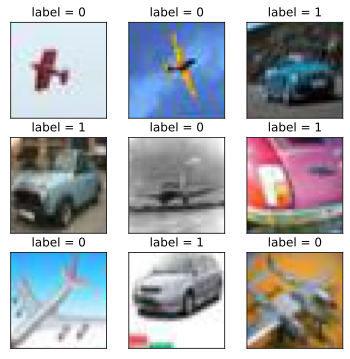

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(6,6)) 
for i,(img,label) in enumerate(ds3.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

# 从csv文件构建数据管道

In [9]:
ds4 = tf.data.experimental.make_csv_dataset(
      file_pattern = [r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\train.csv',r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\test.csv'],
      batch_size=3, 
      label_name="Survived",
      na_value="",
      num_epochs=1,
      ignore_errors=True)

for data,label in ds4.take(2):
    print(data,label)

OrderedDict([('PassengerId', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([528, 884, 775])>), ('Pclass', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 2])>), ('Name', <tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'Farthing, Mr. John', b'Banfield, Mr. Frederick James',
       b'Hocking, Mrs. Elizabeth (Eliza Needs)'], dtype=object)>), ('Sex', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'male', b'male', b'female'], dtype=object)>), ('Age', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0., 28., 54.], dtype=float32)>), ('SibSp', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 1])>), ('Parch', <tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 0, 3])>), ('Ticket', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'PC 17483', b'C.A./SOTON 34068', b'29105'], dtype=object)>), ('Fare', <tf.Tensor: shape=(3,), dtype=float32, numpy=array([221.7792,  10.5   ,  23.    ], dtype=float32)>), ('Cabin', <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'

# 从文本文件构建数据通道

In [10]:
ds5 = tf.data.TextLineDataset(
    filenames = [r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\train.csv',r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\test.csv']
    ).skip(1) #略去第一行header

for line in ds5.take(5):
    print(line)

tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,,S', shape=(), dtype=string)


# 从文件路径构建数据管道

In [11]:
ds6 = tf.data.Dataset.list_files(r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\cifar2\train\*\*.jpg')
for file in ds6.take(5):
    print(file)

tf.Tensor(b'C:\\Users\\Alienware\\Desktop\\tensorflow\\eat_tensorflow2_in_30_days-master\\data\\cifar2\\train\\airplane\\2091.jpg', shape=(), dtype=string)
tf.Tensor(b'C:\\Users\\Alienware\\Desktop\\tensorflow\\eat_tensorflow2_in_30_days-master\\data\\cifar2\\train\\automobile\\2594.jpg', shape=(), dtype=string)
tf.Tensor(b'C:\\Users\\Alienware\\Desktop\\tensorflow\\eat_tensorflow2_in_30_days-master\\data\\cifar2\\train\\automobile\\4602.jpg', shape=(), dtype=string)
tf.Tensor(b'C:\\Users\\Alienware\\Desktop\\tensorflow\\eat_tensorflow2_in_30_days-master\\data\\cifar2\\train\\automobile\\955.jpg', shape=(), dtype=string)
tf.Tensor(b'C:\\Users\\Alienware\\Desktop\\tensorflow\\eat_tensorflow2_in_30_days-master\\data\\cifar2\\train\\airplane\\3616.jpg', shape=(), dtype=string)


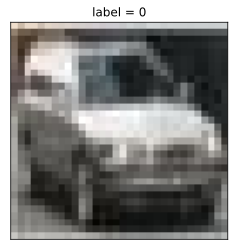

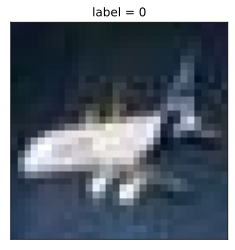

In [12]:
from matplotlib import pyplot as plt 
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
    img = tf.image.resize(img,size)
    return(img,label)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
for i,(img,label) in enumerate(ds6.map(load_image).take(2)):
    plt.figure(i)
    plt.imshow((img/255.0).numpy())
    plt.title("label = %d"%label)
    plt.xticks([])
    plt.yticks([])

In [19]:
#map:将转换函数映射到数据集每一个元素

ds = tf.data.Dataset.from_tensor_slices(['hello world','hello China','hello Beijing'])
ds_map = ds.map(lambda x: tf.strings.split(x,' '))
for a in ds_map:
    print(a)

tf.Tensor([b'hello' b'world'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'China'], shape=(2,), dtype=string)
tf.Tensor([b'hello' b'Beijing'], shape=(2,), dtype=string)


In [22]:
#flat_map:将转换函数映射到数据集的每一个元素，并将嵌套的Dataset压平。

ds_flatmap = ds.flat_map(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_flatmap:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'China', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'Beijing', shape=(), dtype=string)


In [23]:
# interleave: 效果类似flat_map,但可以将不同来源的数据夹在一起。

ds = tf.data.Dataset.from_tensor_slices(["hello world","hello China","hello Beijing"])
ds_interleave = ds.interleave(lambda x:tf.data.Dataset.from_tensor_slices(tf.strings.split(x," ")))
for x in ds_interleave:
    print(x)

tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'hello', shape=(), dtype=string)
tf.Tensor(b'world', shape=(), dtype=string)
tf.Tensor(b'China', shape=(), dtype=string)
tf.Tensor(b'Beijing', shape=(), dtype=string)


In [25]:
#filter:过滤掉某些元素。

ds = tf.data.Dataset.from_tensor_slices(["hello world","hello China","hello Beijing"])

#找出含有字母a或B的元素
ds_filter = ds.filter(lambda x: tf.strings.regex_full_match(x,'.*[a|B].*'))
for x in ds_filter:
    print(x)

tf.Tensor(b'hello China', shape=(), dtype=string)
tf.Tensor(b'hello Beijing', shape=(), dtype=string)


In [32]:
#tf.data.Dataset.zip 将长度相同的Dataset纵向合并
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds3 = tf.data.Dataset.range(6,9)

ds_zip = tf.data.Dataset.zip((ds1,ds2,ds3))
for x,y,z in ds_zip:
    tf.print(x,y,z)

0 3 6
1 4 7
2 5 8


In [38]:
#concatenate将两个dataset纵向连接
ds1 = tf.data.Dataset.range(0,3)
ds2 = tf.data.Dataset.range(3,6)
ds3 = tf.data.Dataset.range(6,9)

ds_concat = tf.data.Dataset.concatenate(ds2,ds3)
for x in ds_concat:
    tf.print(x)


3
4
5
6
7
8


In [42]:
#reduce:执行归并操作。
ds = tf.data.Dataset.from_tensor_slices([1,2,3,4,5.0])
result = ds.reduce(0.0,lambda x,y: tf.add(x,y))
result

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [43]:
#batch:构建批次，每次放一个批次。比原始数据增加一个维度。 其逆操作为unbatch。 

ds = tf.data.Dataset.range(12)
ds_batch = ds.batch(4)
for x in ds_batch:
    print(x)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int64)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int64)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int64)


In [45]:
#padded_batch:构建批次，类似batch, 但可以填充到相同的形状。

elements = [[1, 2],[3, 4, 5],[6, 7],[8]]
ds = tf.data.Dataset.from_generator(lambda: iter(elements), tf.int32)

ds_padded_batch = ds.padded_batch(2,padded_shapes = [4,])
for x in ds_padded_batch:
    print(x)   

tf.Tensor(
[[1 2 0 0]
 [3 4 5 0]], shape=(2, 4), dtype=int32)
tf.Tensor(
[[6 7 0 0]
 [8 0 0 0]], shape=(2, 4), dtype=int32)


In [47]:
ds = tf.data.Dataset.range(12)
ds_window = ds.window(3, shift = 1).flat_map(lambda x:x.batch(3,drop_remainder=True))
for x in ds_window:
    print(x)

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor([2 3 4], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([4 5 6], shape=(3,), dtype=int64)
tf.Tensor([5 6 7], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)
tf.Tensor([7 8 9], shape=(3,), dtype=int64)
tf.Tensor([ 8  9 10], shape=(3,), dtype=int64)
tf.Tensor([ 9 10 11], shape=(3,), dtype=int64)


In [55]:
#shuffle:数据顺序洗牌。

ds = tf.data.Dataset.range(12)
ds_shuffle = ds.shuffle(buffer_size = 5)
for x in ds_shuffle:
    print(x)

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)


In [59]:
#repeat:重复数据若干次，不带参数时，重复无数次。

ds = tf.data.Dataset.range(4)
ds_repeat = ds.repeat(2)
for x in ds_repeat:
    print(x)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


In [63]:
#shard:采样，从某个位置开始隔固定距离采样一个元素。

ds = tf.data.Dataset.range(12)
ds_shard = ds.shard(3,index = 1)

for x in ds_shard:
    print(x)

tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)


In [66]:
#take:采样，从开始位置取前几个元素。

ds = tf.data.Dataset.range(12)
ds_take = ds.take(3)

for x in ds_take:
    print(x)
    
list(ds_take.as_numpy_iterator())


tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)


[0, 1, 2]

# 提升管道性能 多进程
1、 使用prefetch方法让数据准备和参数迭代两个过程相互并行

In [67]:
@tf.function
def printbar():
    ts = tf.timestamp()
    today_ts = ts%(24*60*60)
    hour = tf.cast(today_ts//3600+8,tf.int32)%tf.constant(24)
    minite = tf.cast((today_ts%3600)//60, tf.int32)
    second = tf.cast(tf.floor(today_ts%60),tf.int32)
    
    def timeformat(m):
        if tf.strings.length(tf.strings.format('{}',m))==1:
            return(tf.strings.format("0{}",m))
        else:
            return(tf.strings.format("{}",m))
    
    timestring = tf.strings.join([timeformat(hour),timeformat(minite),
                timeformat(second)],separator = ":")
    tf.print("=========="*8,end = "")
    tf.print(timestring)

In [75]:
# 数据准备和参数迭代两个过程默认情况下是串行的。


import time

def generator():
    for i in range(10):
        time.sleep(2)
        yield i
ds = tf.data.Dataset.from_generator(generator, output_types = (tf.int32))

def train_step():
    time.sleep(1)

In [77]:
## 训练过程预计耗时 10*2+10*1+ = 30s

printbar()
tf.print(tf.constant("start training..."))
for x in ds:
    train_step()
printbar()
tf.print(tf.constant("end training..."))


================================================================================18:44:42
start training...
================================================================================18:45:13
end training...


# # 使用 prefetch 方法让数据准备和参数迭代两个过程相互并行。

In [79]:
### 使用 prefetch 方法让数据准备和参数迭代两个过程相互并行。

# 训练过程预计耗时 max(10*2,10*1) = 20s

printbar()
tf.print(tf.constant('start trining with prefetch..'))

# tf.data.experimental.AUTOTUNE 可以让程序自动选择合适的参数

for x in ds.prefetch(buffer_size = tf.data.experimental.AUTOTUNE):
    train_step()
printbar()
tf.print(tf.constant('end training...'))

================================================================================21:06:53
start trining with prefetch..
================================================================================21:07:14
end training...


In [85]:
ds_files = tf.data.Dataset.list_files(r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\*.csv')
ds = ds_files.flat_map(lambda x:tf.data.TextLineDataset(x).skip(1))
for line in ds.take(4):
    print(line)

tf.Tensor(b'181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S', shape=(), dtype=string)
tf.Tensor(b'405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,,S', shape=(), dtype=string)
tf.Tensor(b'635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,,S', shape=(), dtype=string)
tf.Tensor(b'701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C', shape=(), dtype=string)


In [84]:
#df_files.interleave可以让数据读取过程多进程执行，并将不同来源数据加在一起

ds_files = tf.data.Dataset.list_files(r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\titanic\*.csv')
ds = ds_files.interleave(lambda x:tf.data.TextLineDataset(x).skip(1))
for line in ds.take(8):
    print(line)

tf.Tensor(b'181,0,3,"Sage, Miss. Constance Gladys",female,,8,2,CA. 2343,69.55,,S', shape=(), dtype=string)
tf.Tensor(b'493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5,C30,S', shape=(), dtype=string)
tf.Tensor(b'405,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,,S', shape=(), dtype=string)
tf.Tensor(b'53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C', shape=(), dtype=string)
tf.Tensor(b'635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,,S', shape=(), dtype=string)
tf.Tensor(b'388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0,,S', shape=(), dtype=string)
tf.Tensor(b'701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.525,C62 C64,C', shape=(), dtype=string)
tf.Tensor(b'192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0,,S', shape=(), dtype=string)


In [86]:
##使用map是设置 num_parallel_calls让数据转换过程多进行执行

ls = tf.data.Dataset.list_files(r'C:\Users\Alienware\Desktop\tensorflow\eat_tensorflow2_in_30_days-master\data\cifar2\train\*\*.jpg')
def load_image(img_path,size = (32,32)):
    label = 1 if tf.strings.regex_full_match(img_path,".*/automobile/.*") else 0
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
    img = tf.image.resize(img,size)
    return(img,label)

In [90]:
#先map后batch
ds = tf.data.Dataset.range(100000)
ds_map_batch = ds.map(lambda x:x**2).batch(20)

printbar()
tf.print(tf.constant("start scalar transformation..."))
for x in ds_map_batch:
    pass
printbar()
tf.print(tf.constant("end scalar transformation..."))

================================================================================21:28:25
start scalar transformation...
================================================================================21:28:26
end scalar transformation...


In [91]:
#先batch后map
ds = tf.data.Dataset.range(100000)
ds_batch_map = ds.batch(20).map(lambda x:x**2)

printbar()
tf.print(tf.constant("start vector transformation..."))
for x in ds_batch_map:
    pass
printbar()
tf.print(tf.constant("end vector transformation..."))

================================================================================21:28:33
start vector transformation...
================================================================================21:28:33
end vector transformation...
